## What does the most "normal" rescue dog look like?

During the beginning of COVID-19, many locked-down milennials and gen-z-ers found their homes getting 4 feet (erm, paws) bigger. While the homes welcomed all shapes and sizes of new furry friends, what does the most normal rescue dog look like?

We'll start by importing a scraped list of dogs on the popular [petfinder.com](petfinder.com), a top site for animals in need of a home. 

## Perform data prep and cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from string import punctuation
import markovify

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-17/dog_descriptions.csv"
data = pd.read_csv(url)

Let's check out the data first.

In [3]:
# get column names
data.columns

Index(['id', 'org_id', 'url', 'species', 'breed_primary', 'breed_secondary',
       'breed_mixed', 'breed_unknown', 'color_primary', 'color_secondary',
       'color_tertiary', 'age', 'sex', 'size', 'coat', 'fixed',
       'house_trained', 'declawed', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'name', 'tags', 'photo',
       'status', 'posted', 'contact_city', 'contact_state', 'contact_zip',
       'contact_country', 'stateQ', 'accessed', 'type', 'description'],
      dtype='object')

In [4]:
# get statisitical properties of numeric variables
data.describe()

,id,declawed
count,5.818000e+04,0.0
mean,4.425148e+07,NaN
std,3.818970e+06,NaN
min,6.041150e+05,NaN
25%,4.451688e+07,NaN
50%,4.559662e+07,NaN
75%,4.591667e+07,NaN
max,4.604315e+07,NaN


There are not many numeric statistics here, so we will have to take that into account when diving into the data.

In [5]:
# get general information of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58180 entries, 0 to 58179
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               58180 non-null  int64  
 1   org_id           58180 non-null  object 
 2   url              58180 non-null  object 
 3   species          58180 non-null  object 
 4   breed_primary    58180 non-null  object 
 5   breed_secondary  20821 non-null  object 
 6   breed_mixed      58180 non-null  bool   
 7   breed_unknown    58180 non-null  bool   
 8   color_primary    26134 non-null  object 
 9   color_secondary  12059 non-null  object 
 10  color_tertiary   1217 non-null   object 
 11  age              58180 non-null  object 
 12  sex              58180 non-null  object 
 13  size             58180 non-null  object 
 14  coat             27185 non-null  object 
 15  fixed            58180 non-null  bool   
 16  house_trained    58180 non-null  bool   
 17  declawed    

From here, it's important to know that there are 0 non-null rows for declawed. We won't want to use this column!

In [6]:
data.head(10)

,id,org_id,url,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,color_secondary,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type,description
0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,American Staffordshire Terrier,Mixed Breed,True,False,White / Cream,Yellow / Tan / Blond / Fawn,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Pit Bull Terrier,Mixed Breed,True,False,Brown / Chocolate,White / Cream,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Shepherd,NaN,False,False,Brindle,NaN,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,German Shepherd Dog,NaN,False,False,NaN,NaN,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dachshund,NaN,False,False,NaN,NaN,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...
5,46039304,NV184,https://www.petfinder.com/dog/oliver-46039304/...,Dog,Boxer,Beagle,True,False,NaN,NaN,...,adoptable,2019-09-20T06:43:59+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Oliver was born around mid-June and came to us...
6,46039303,NV184,https://www.petfinder.com/dog/macadamia-460393...,Dog,Italian Greyhound,Chihuahua,True,False,NaN,NaN,...,adoptable,2019-09-20T06:42:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Macadamia was born around July 8th and donât...
7,46039302,NV184,https://www.petfinder.com/dog/dodger-46039302/...,Dog,Cattle Dog,NaN,True,False,NaN,NaN,...,adoptable,2019-09-20T06:40:08+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,"Dodger is a handsome, smart Heeler mix who was..."
8,46039301,NV184,https://www.petfinder.com/dog/huckleberry-4603...,Dog,Cattle Dog,NaN,True,False,NaN,NaN,...,adoptable,2019-09-20T06:37:05+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Huckleberry is a friendly girl who was born Ma...
9,46038709,NV184,https://www.petfinder.com/dog/fagin-46038709/n...,Dog,Cattle Dog,NaN,True,False,NaN,NaN,...,adoptable,2019-09-20T05:00:51+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,"Fagin was born on May 26th and is a smart, inq..."


From this dataframe, let's look at a few select columns. 

In [7]:
breed_desc = data[['breed_primary','age', 'sex', 'size', 'status', 'description', 'contact_city', 'contact_state','fixed',
       'house_trained', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'posted']].dropna() # drop empty values

<AxesSubplot:>

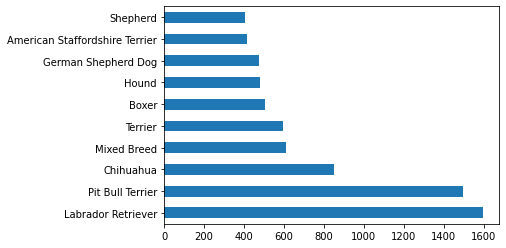

In [8]:
breed_desc["breed_primary"].value_counts().head(10).plot(kind='barh')

Most dogs are Labs, Pit Bulls, or Chihuahuas. Do note, that this is a dog's "primary breed," so it is probably the case that many of these dogs are indeed mixed, but this is the breed they most resemble.

<AxesSubplot:ylabel='age,sex'>

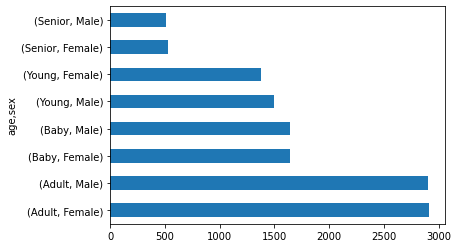

In [9]:
breed_desc[["age", "sex"]].value_counts().plot(kind='barh')

Most dogs are adults (female, then male), then baby (female, then male), then young (male, then female), then senior (female, male).

<AxesSubplot:>

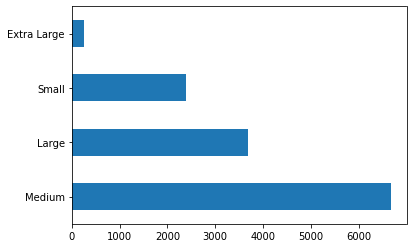

In [10]:
breed_desc["size"].value_counts().plot(kind='barh')

Most dogs are "medium sized." This overview has given us good quantitative data of what the dogs looks like, but the heart and soul of a rescue dog's personality lives in the description.

## Q1: What does a typical description of a dog look like?

First, let's clean the descritptions to remove punctuation, extra spaces, tabs, and new lines.

In [11]:
def clean_desc(text):
    text = text.lower()  # lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

In [12]:
breed_desc["clean_text"] = breed_desc["description"].map(clean_desc) # perform clean_desc function on every row
breed_desc["clean_text"]

4        theo is a friendly dachshund mix who gets alon...
5        oliver was born around midjune and came to us ...
6        macadamia was born around july 8th and donât...
7        dodger is a handsome smart heeler mix who was ...
8        huckleberry is a friendly girl who was born ma...
                               ...                        
58164    dwayne is your typical adolescent happy playfu...
58165    sebastian is your typical herding dog high ene...
58166    charlie was adopted from us 5 years ago but re...
58167    samson is a dog that will need someone to show...
58172    buddy was an owner surrender by an older gentl...
Name: clean_text, Length: 12992, dtype: object

Then, we'll remove the `stopwords`, or commonly used words such as "the", "is", "as", "a", and "and."

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))

def remove_stop(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    return filtered_sentence

breed_desc["no_stop"] = breed_desc["clean_text"].map(remove_stop)

Finally, we'll use a counter to count the occurances of each word in all the descriptions.

In [14]:
from collections import Counter
c = Counter()
for row in breed_desc["no_stop"]:
    for word in set(row):
        c[word] += 1

In [15]:
top_words = pd.DataFrame.from_dict(c, orient='index').sort_values(by=0, ascending=False)
top_words.head(30)

,0
dogs,8018
home,7703
please,7206
adoption,6843
old,6507
dog,6284
application,6089
would,5332
loves,5000
family,4646


It looks like the top words include expected words like "dog", "dogs", "good", but also includes others such as "old" (which is surprising since we saw most dogs were actually adult age). It also looks like people are well mannered when explaining next steps for adopting dogs: words like "please", "fill" and "application" rank highly on the list.

## Q2: Can we generate our own dog descriptions?
### (or, Markov chains and text wrangling for computer-generated descriptions)

We can use a technique called [Markov chains](https://setosa.io/ev/markov-chains/) and the library [markovify](https://pypi.org/project/markovify/) to use natural language processing techniques for generating fake dog descriptions.

In [16]:
# set seed for reproducibility
np.random.seed(500)

# take 4 words at a time to train markov chain
text_model = markovify.Text(breed_desc["clean_text"], state_size=4)

# generate three sentences of 280 character length from trained model
for i in range(3):
    print(text_model.make_short_sentence(280) + "\n")

are you looking for a good home and promise to love you to the max

nys registered rescue rr102 ngpr dogs are in foster care once approved the foster parent for the dog you have selected will contact you to schedule a meet and greet with her

meet shepherd a good looking guy he is sweet and snuggly a bit hyper but he listens very well he is so smart a very good dog



This was quite fun. It looks like these are almost normal looking sentences! Markov chains are great for analyzing large corpus and generating similar word chains. If we wanted this to be even more natural sounding, we might increase our state size. However, this will take much longer to train, and it may overfit and just memorize words. For now, this looks like a great start to catfishing dogs.

## Q3: Are Pit Bulls really mean?

Pit Bulls get a bad wrap for being a dog with an attitude issue. To see if this hypothesis holds up, let's look at the variables `env_dogs`, `env_children`, and `env_cats`, which denotes if a dog is safe to live in a home with other dogs, children, and cats, respectively.

In [17]:
pb = breed_desc[breed_desc["breed_primary"] == "Pit Bull Terrier"]

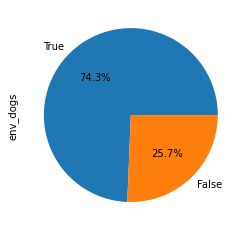

In [18]:
pb["env_dogs"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

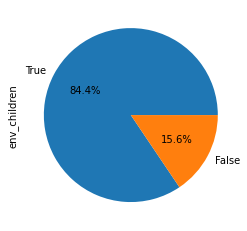

In [19]:
pb["env_children"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

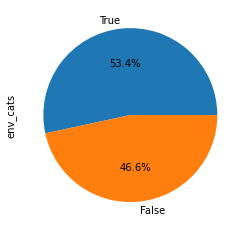

In [20]:
pb["env_cats"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Looking at these graphs, the majority of pit bulls are safe with kids and dogs, and about half are safe for cat-owners. This certainly isn't thourough evidence to say much on the breed, but hopefully it sheds light on the kind of homes these dogs thrive in.

## Q4: What states have the most adoptable dogs?

In [21]:
import plotly.express as px

# find number of occurances for each state
states = breed_desc.contact_state.value_counts().to_frame()
states['state'] = states.index
print(states.index)

Index(['PA', 'NY', 'NJ', 'GA', 'FL', 'OH', 'VA', 'NC', 'IN', 'CT', 'TN', 'AZ',
       'WA', 'CO', 'OK', 'SC', 'MN', 'MD', 'IL', 'KY', 'MA', 'CA', 'AL', 'VT',
       'MS', 'ME', 'MO', 'NV', 'RI', 'MI', 'LA', 'IA', 'WI', 'AR', 'NM', 'WV',
       'TX', 'NH', 'KS', 'DC', 'DE', 'ND', 'UT', 'OR', 'WY', 'NE', 'ID', 'AK',
       'QC', 'SD', '98106', 'NB', '45249', '37189', '12220', '61944'],
      dtype='object')


Not all of these are valid US states. Some are from Canada, and some are zip codes. After doing some digging, I was able to locate where all of the zip codes are from, and decided to remove the Canadian provinces.

In [22]:
# rows that we do not want as part of our map
excess_rows = ['98106', '45249', '37189', '12220', '61944', 'QC', 'NB']

# add together the rows that include the zip code of the state, then drop the rows
states.loc['OH', 'contact_state'] = states.loc['45249', 'contact_state'] + states.loc['OH', 'contact_state']
states.loc['TN', 'contact_state'] = states.loc['37189', 'contact_state'] + states.loc['TN', 'contact_state']
states.loc['NY', 'contact_state'] = states.loc['12220', 'contact_state'] + states.loc['NY', 'contact_state']
states.loc['IL', 'contact_state'] = states.loc['61944', 'contact_state'] + states.loc['IL', 'contact_state']
states.loc['WA', 'contact_state'] = states.loc['98106', 'contact_state'] + states.loc['WA', 'contact_state']
states['adoptable_dogs'] = states['contact_state']
states = states.drop(excess_rows)

In [23]:
px.choropleth(states, locations='state', locationmode="USA-states", color='adoptable_dogs',
                           scope="usa"
                          )

Every state, besides Montana and Hawaii has adoptable dogs! New York and Pennsylvania seem to have the most adoptable dogs with over 1000 each, whereas Alaska only has 5. It might be important to check for data integrity at the API level, because it seems unlikely that states have NO dogs for adoption.